In [2]:
from correction.models.changeToERA5 import MeanToERA5
from correction.models.loss import TurbulentMSE
from correction.data.scalers import StandardScaler
import os
import torch
import torch.nn as nn
import numpy as np
import scipy
import matplotlib.pyplot as plt

### Проверка, что скейлер не изменяет входной тензор

In [3]:
scaler = StandardScaler()

### Проверка гауссова ядра

In [18]:
class GaussianLayer(nn.Module):
    def __init__(self, k=21):
        super(GaussianLayer, self).__init__()
        self.seq = nn.Conv2d(3, 3, k, stride=1, padding=k//2, bias=False, groups=3, padding_mode='replicate')

        self.weights_init()

    def forward(self, x):
        return self.seq(x)

    def weights_init(self):
        n = np.zeros((21, 21))
        n[10, 10] = 1
        k = scipy.ndimage.gaussian_filter(n, sigma=3)
        for name, f in self.named_parameters():
            f.data.copy_(torch.from_numpy(k))

In [31]:
layer = GaussianLayer()
a = torch.rand([3, 100, 100])
a.shape, layer(a).shape

(torch.Size([3, 100, 100]), torch.Size([3, 100, 100]))

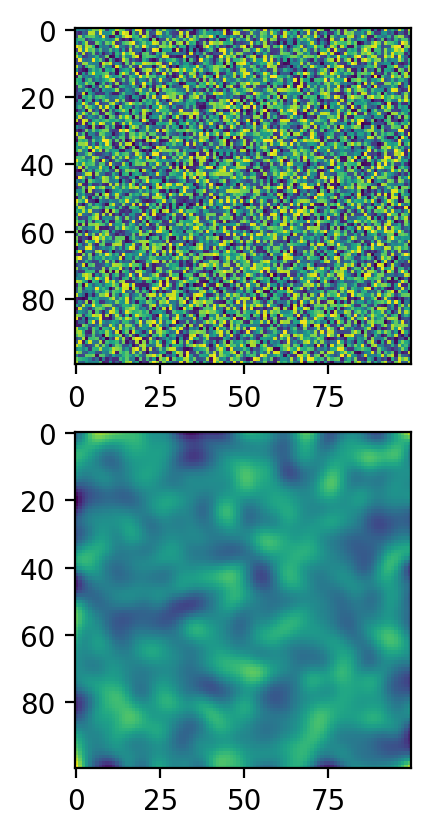

In [30]:
fig, axs = plt.subplots(2, 1, dpi=200)
axs[0].imshow(a[0])
axs[1].imshow(layer(a)[0].detach())

### Проверка, что подсчет метрики не видоизменяет тензор

In [6]:
meaner = MeanToERA5(os.path.join('C:\\Users\\Viktor\\ml\\WRFCorrection', 'wrferaMapping.npy'))
criterion = TurbulentMSE(meaner, beta=0.5, logger=None)
def calculate_metric(wrf_orig, wrf_corr, era, criterion):
    loss_orig = criterion(wrf_orig, wrf_orig, era)
    loss_corr = criterion(wrf_orig, wrf_corr, era)
    metric = ((loss_orig - loss_corr) / loss_orig).mean()
    return loss_orig.item(), loss_corr.item(), metric.item()

In [7]:
wrf = torch.rand([4, 2, 6, 210, 280])
era = torch.rand([4, 2, 3, 67, 215])

In [8]:
wrf_0 = torch.clone(wrf)

In [9]:
_ = calculate_metric(wrf[:, :, :3], wrf[:, :, :3], era, criterion)

torch.Size([4, 2, 3, 210, 280]) 5
torch.Size([4, 2, 3, 210, 280]) 5


In [10]:
m

NameError: name 'm' is not defined

In [11]:
(wrf_0 - wrf).sum()

tensor(0.)

In [2]:
k = 7
layer = torch.nn.Conv2d(3, 3, k, groups=3, bias=False, padding=k // 2, padding_mode='replicate')

In [5]:
a = torch.rand([4, 2 ,3, 40, 40])
layer(a.view(-1, 3, 40, 40)).view(a.shape).shape

torch.Size([4, 2, 3, 40, 40])